<a href="https://colab.research.google.com/github/kliang696/Rental_Prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import mstats
from scipy.stats.mstats import winsorize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_df = pd.read_csv("/content/drive/MyDrive/housing/housing.csv")

In [ ]:
my_df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


## Data Pre-Processing

### Check Duplicate

In [ ]:
duplicates = my_df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


### Missing Values

In [ ]:
my_df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

#### fill missing value for laundry_options "no laundry on site"

In [ ]:
my_df["laundry_options"].value_counts()

w/d in unit           131783
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

In [ ]:
my_df["laundry_options"].fillna("no laundry on site", inplace=True)

In [ ]:
my_df["laundry_options"].value_counts()

w/d in unit           131783
no laundry on site     82650
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
Name: laundry_options, dtype: int64

#### fill missing value for parking_options "no parking"

In [ ]:
my_df["parking_options"].value_counts()

off-street parking    128502
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: parking_options, dtype: int64

In [ ]:
my_df["parking_options"].fillna("no parking", inplace=True)

In [ ]:
my_df["parking_options"].value_counts()

no parking            143875
off-street parking    128502
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
valet parking            163
Name: parking_options, dtype: int64

#### drop missing values for lat long

In [ ]:
my_df.dropna(inplace=True)

In [ ]:
my_df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

### Drop the unnessary column 

In [ ]:
df=my_df.drop(columns=['url', 'id','region_url','image_url', 'description'])

### Numerical Value

In [ ]:
num = df.select_dtypes(include=["int64","float64"]).columns.tolist()

In [ ]:
df[num].describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.830570e+05,3.830570e+05,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000,383057.000000
mean,8.862188e+03,1.059199e+03,1.904127,1.480063,0.727263,0.708101,0.731962,0.082228,0.012875,0.047680,37.233488,-92.700710
std,4.473369e+06,1.919865e+04,3.502636,0.617504,0.445368,0.454637,0.442938,0.274712,0.112737,0.213088,5.546175,16.531985
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.060000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,1.035000e+03,9.480000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745400
75%,1.395000e+03,1.149000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


#### Exclude the house with more than 5 beds and baths

In [ ]:
df = df[(df['beds'] <= 5) & (df['beds'] > 0)]

In [ ]:
df["beds"].value_counts()

2    174703
1    116823
3     66520
4     11454
5      2313
Name: beds, dtype: int64

In [ ]:
df = df[(df['baths'] <= 5) & (df['baths'] > 0)]

In [ ]:
df["baths"].value_counts()

1.0    186520
2.0    133841
1.5     27226
2.5     13003
3.0      5348
4.0      1436
3.5       968
4.5       206
5.0       104
Name: baths, dtype: int64

#### Exclude the house with unreasonal price and sqfeet

In [ ]:
df = df[df['price']>100]  

In [ ]:
df = df[df['sqfeet']>200]

### Percentile Capping for price and sqfeet to remove outlier

In [ ]:
num_price_sf=["price" ,	"sqfeet"]

<AxesSubplot:xlabel='price', ylabel='Density'>

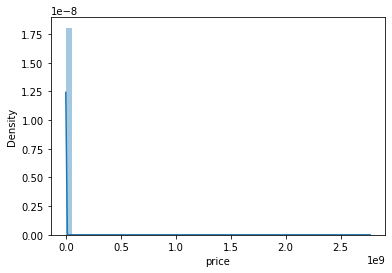

In [ ]:
sns.distplot(df["price"])

<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

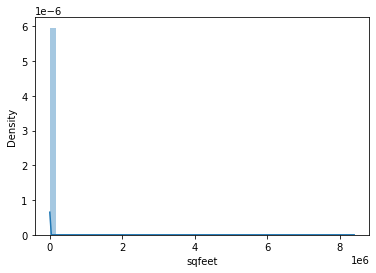

In [ ]:
sns.distplot(df["sqfeet"])

In [ ]:
lower_threshold = 0
upper_threshold = 0.01

for i in range(len(num_price_sf)):
    column = num_price_sf[i]
    df[column] = winsorize(df[column], limits=(lower_threshold, upper_threshold))

<AxesSubplot:xlabel='price', ylabel='Density'>

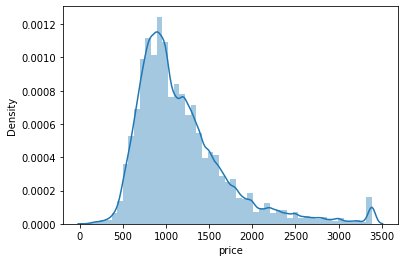

In [ ]:
sns.distplot(df["price"])

<AxesSubplot:xlabel='price'>

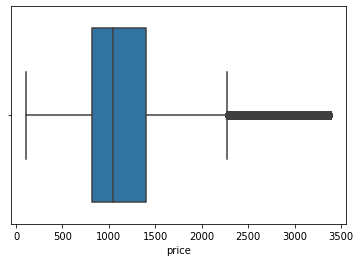

In [ ]:
sns.boxplot(df["price"])

<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

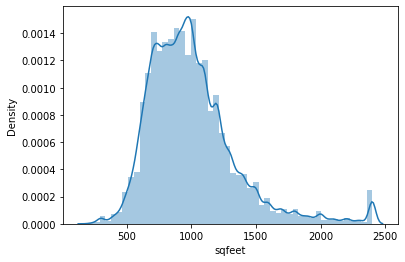

In [ ]:
sns.distplot(df["sqfeet"])

In [ ]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000,365430.000000
mean,1183.905180,1003.284728,1.945278,1.503709,0.727800,0.709433,0.734808,0.079941,0.012684,0.043913,37.215758,-92.548817
std,536.439545,342.157368,0.816244,0.571648,0.445093,0.454025,0.441436,0.271203,0.111906,0.204901,5.545757,16.471982
min,106.000000,204.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,820.000000,766.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.423700,-98.654325
50%,1049.000000,950.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.618100,-87.622300
75%,1400.000000,1152.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.137900,-81.162800
max,3385.000000,2400.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [ ]:
df.shape

(365430, 17)

### Heat Map

<AxesSubplot:>

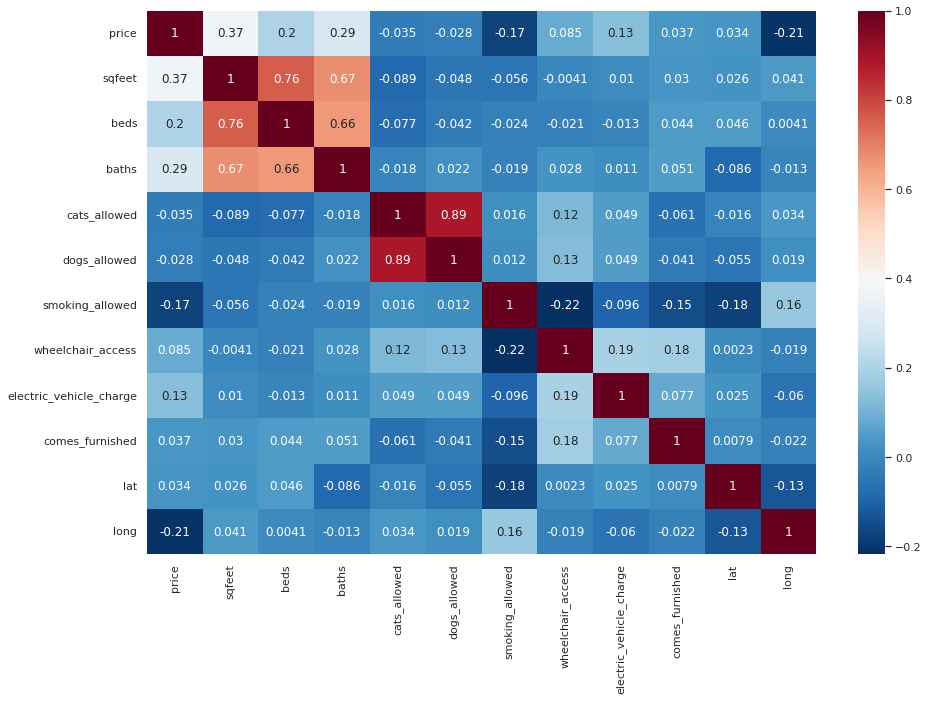

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')

In [ ]:
df.to_csv('df.csv',index=False)

# Modeling

## Import packages

In [ ]:
pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 16.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,r2_score

In [ ]:
X_cbt= df.drop(["price"],axis=1)
y_cbt = df['price']

##  train_test_valid set

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, y, train_size=0.70, valid_size=0.15, test_size=0.15)
X_train, X_rem, y_train, y_rem = train_test_split(X_cbt, y_cbt,train_size=0.70)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,test_size=0.5)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

print(X_test.shape)
print(y_test.shape)

(255899, 16)
(255899,)
(54836, 16)
(54836,)
(54836, 16)
(54836,)


## Catboost Regressor

In [ ]:
categoricalcolumns = X_cbt.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X_cbt.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['region', 'type', 'laundry_options', 'parking_options', 'state']
Location of categorical columns :  [0, 1, 11, 12, 15]


In [ ]:
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [ ]:
cbt = CatBoostRegressor(learning_rate= 0.2515, 
    depth=13, 
    loss_function="RMSE")

In [ ]:
cbt.fit(X_train, y_train,verbose=False,eval_set=(X_test, y_test),cat_features=cat_features)

In [ ]:
y_pred_cbt = cbt.predict(X_test)

### Metrics

In [ ]:
# calculate MSE
mse_cbt = mean_squared_error(y_test, y_pred_cbt)
print("Mean Squared Error: ", mse_cbt) 

# calculate MAE
mae_cbt = mean_absolute_error(y_test, y_pred_cbt)
print("Mean Absolute Error: ", mae_cbt)

# calculate RMSE
rmse_cbt = (mean_squared_error(y_test, y_pred_cbt))**0.5
print("Root Mean Squared Error: ", rmse_cbt)

from sklearn.metrics import r2_score
r2_cbt = r2_score(y_test, y_pred_cbt)
print("R2 Score: ", r2_cbt)

Mean Squared Error:  33352.6983781585
Mean Absolute Error:  92.51049204244127
Root Mean Squared Error:  182.62721149423078
R2 Score:  0.8848440627495203


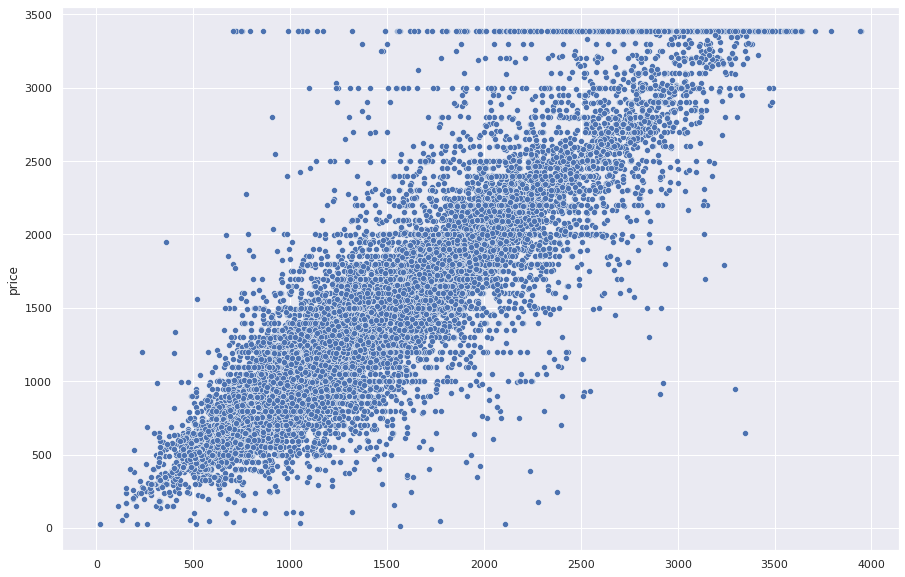

In [ ]:
ax=sns.scatterplot(x=y_pred_cbt, y=y_test)

In [ ]:
pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 14.6 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()
explainer= shap.TreeExplainer(cbt)
shap_values = explainer.shap_values(X_test)


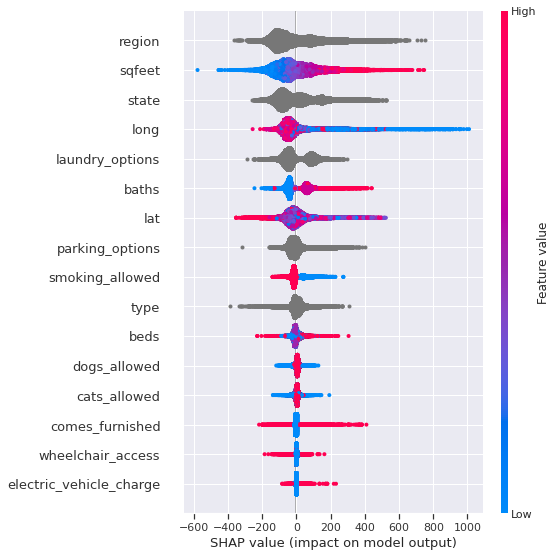

In [ ]:
shap.summary_plot(shap_values, X_test)

## Encode Categorical Features

In [ ]:
cat= ['region', 'type', 'laundry_options', 'parking_options', 'state']

In [ ]:
df_encoded = pd.get_dummies(df, columns=cat)

## Linear Regression

In [ ]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_lr)


### Metrics

In [ ]:
# calculate MSE
mse_lr = mean_squared_error(y_test_lr, y_pred_lr) 
print("Mean Squared Error: ", mse_lr)

# calculate MAE
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
print("Mean Absolute Error: ", mae_lr)

# calculate RMSE
rmse_lr = (mean_squared_error(y_test_lr, y_pred_lr))**0.5
print("Root Mean Squared Error: ", rmse_lr)

from sklearn.metrics import r2_score
r2_lr = r2_score(y_test_lr, y_pred_lr)
print("R2 Score: ", r2_lr)


Mean Squared Error:  86118.3831268565
Mean Absolute Error:  190.76302099121483
Root Mean Squared Error:  293.45933811493626
R2 Score:  0.6972141551251614


## Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(max_depth=5,learning_rate=0.29697495206176383,num_leaves=386,num_iterations=1527,max_bin=2082)

# Fit the model to the training data
lgbm.fit(X_train_lr, y_train_lr)

y_pred_lgbm = lgbm.predict(X_test_lr)

### Metrics

In [ ]:
mse_lgb = mean_squared_error(y_test_lr, y_pred_lgbm)
print("Mean Squared Error: ", mse_lgb)

# calculate MAE
mae_lgb = mean_absolute_error(y_test_lr, y_pred_lgbm)
print("Mean Absolute Error: ", mae_lgb)

# calculate RMSE
rmse_lgb = (mean_squared_error(y_test_lr, y_pred_lgbm))**0.5
print("Root Mean Squared Error: ", rmse_lgb)

from sklearn.metrics import r2_score
r2_lgb = r2_score(y_test_lr, y_pred_lgbm)
print("R2 Score: ", r2_lgb)

Mean Squared Error:  34735.92471674112
Mean Absolute Error:  104.32900522813581
Root Mean Squared Error:  186.37576214932326
R2 Score:  0.8778710661883375


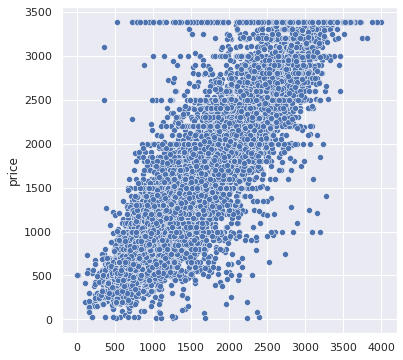

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.scatterplot(x=y_pred_lgbm, y=y_test_lr)

### Hyperparameter tunning using optuna

In [ ]:
pip install optuna --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from lightgbm import cv
from sklearn.metrics import r2_score

def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'depth': trial.suggest_int('depth', 10, 15),
        'num_iterations': trial.suggest_int('iterations', 1500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.7),
        'max_bin':trial.suggest_int('max_bin', 2000, 2500),
         "num_leaves":trial.suggest_int('num_leaves', 300, 500)
       
    }
    
    # Train a CatBoostRegressor model with the current set of hyperparameters
    model = lgb.LGBMRegressor(**params)
    gbm = lgb.train(params,lgb.Dataset(X_train_lr, label=y_train_lr))
    preds = gbm.predict(X_test_lr)
    
    # Compute the average RMSE score across the 5 folds
    r2_lgb_cv = r2_score(y_test_lr, preds)
    
    return r2_lgb_cv

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters and score found by Optuna
best_params = study.best_params
best_score = study.best_value
print("Best parameters: ", best_params)
print("Best score: ", best_score)


[I 2023-03-13 03:32:42,905] A new study created in memory with name: no-name-416e3fd3-06ec-42e8-8c0b-ca3f21df3dcd
[I 2023-03-13 03:35:14,457] Trial 0 finished with value: 0.9032214659685549 and parameters: {'depth': 10, 'iterations': 1615, 'learning_rate': 0.29404424883672264, 'max_bin': 2134, 'num_leaves': 426}. Best is trial 0 with value: 0.9032214659685549.
[I 2023-03-13 03:37:46,175] Trial 1 finished with value: 0.8858827854710083 and parameters: {'depth': 14, 'iterations': 1694, 'learning_rate': 0.5876712237239936, 'max_bin': 2327, 'num_leaves': 470}. Best is trial 0 with value: 0.9032214659685549.
[I 2023-03-13 03:40:00,840] Trial 2 finished with value: 0.9047562111887726 and parameters: {'depth': 12, 'iterations': 1560, 'learning_rate': 0.22102739706682506, 'max_bin': 2060, 'num_leaves': 477}. Best is trial 2 with value: 0.9047562111887726.
[I 2023-03-13 03:42:18,324] Trial 3 finished with value: 0.9085545956893116 and parameters: {'depth': 10, 'iterations': 1736, 'learning_rate

Best parameters:  {'depth': 10, 'iterations': 1736, 'learning_rate': 0.14881048852346823, 'max_bin': 2379, 'num_leaves': 386}
Best score:  0.9085545956893116


In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

### Retrain the model using the best parameters

In [ ]:
lgbm_best = lgb.LGBMRegressor(max_depth=12,learning_rate=0.1712303105065152,num_leaves=491,num_iterations=1983,max_bin=2010)

# Fit the model to the training data
lgbm_best.fit(X_train_lr, y_train_lr)

# Make predictions on test data
y_pred_lgbm_best = lgbm_best.predict(X_test_lr)

In [ ]:
mse_lgb_best = mean_squared_error(y_test_lr, y_pred_lgbm_best)
print("Mean Squared Error: ", mse_lgb_best)

# calculate MAE
mae_lgb_best = mean_absolute_error(y_test_lr, y_pred_lgbm_best)
print("Mean Absolute Error: ", mae_lgb_best)

# calculate RMSE
rmse_lgb_best = (mean_squared_error(y_test_lr, y_pred_lgbm_best))**0.5
print("Root Mean Squared Error: ", rmse_lgb_best)

r2_lgb_best = r2_score(y_test_lr, y_pred_lgbm_best)
print("R2 Score: ", r2_lgb_best)

Mean Squared Error:  27487.36561098361
Mean Absolute Error:  80.08566262223813
Root Mean Squared Error:  165.79314102514496
R2 Score:  0.9033564621429853


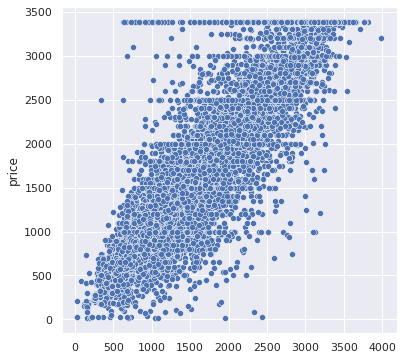

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.scatterplot(x=y_pred_lgbm_best, y=y_test_lr)

## Model Comparison before hyper-parameter tunning

In [ ]:
import pandas as pd
from prettytable import PrettyTable

# create a dictionary of data for the table
data = {'Model': ['Linear Regression', 'Catboost', 'Light GBM'],
        'MAE': [mae_lr, mae_cbt, mae_lgb],
        'MSE': [mse_lr, mse_cbt, mse_lgb],
        'RMSE': [rmse_lr, rmse_cbt, rmse_lgb],
        'R-squared': [r2_lr, r2_cbt, r2_lgb]}
mt = pd.DataFrame(data)

In [ ]:
mt.head()

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,190.763021,86118.383127,293.459338,0.697214
1,Catboost,92.637446,32988.453029,181.627236,0.884258
2,Light GBM,104.329005,34735.924717,186.375762,0.877871


## Model Comparison before hyper-parameter tunning

In [ ]:
# create a dictionary of data for the table
data = {'Model': ['Linear Regression', 'Catboost', 'Light GBM'],
        'MAE': [mae_lr, mae_cbt, mae_lgb_best],
        'MSE': [mse_lr, mse_cbt, mse_lgb_best],
        'RMSE': [rmse_lr, rmse_cbt, rmse_lgb_best],
        'R-squared': [r2_lr, r2_cbt, r2_lgb_best]}

# create a pandas data frame from the data dictionary
mt_best = pd.DataFrame(data)

mt_best.head()


,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,190.763021,86118.383127,293.459338,0.697214
1,Catboost,92.637446,32988.453029,181.627236,0.884258
2,Light GBM,80.085663,27487.365611,165.793141,0.903356


## Shap Value for feature importance

In [ ]:
pip install shap --quiet

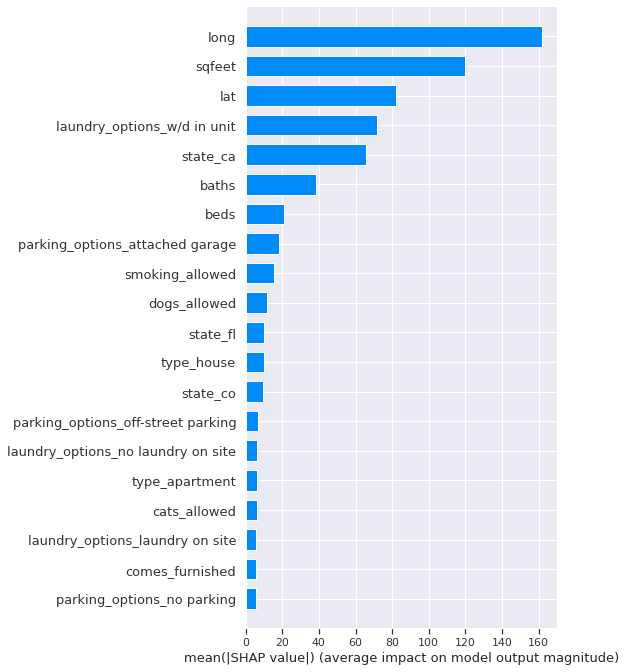

In [ ]:
import shap
shap.initjs()
explainer= shap.TreeExplainer(lgbm_best)
shap_values = explainer.shap_values(X_test_lr)
shap.summary_plot(shap_values, X_test_lr, plot_type="bar")

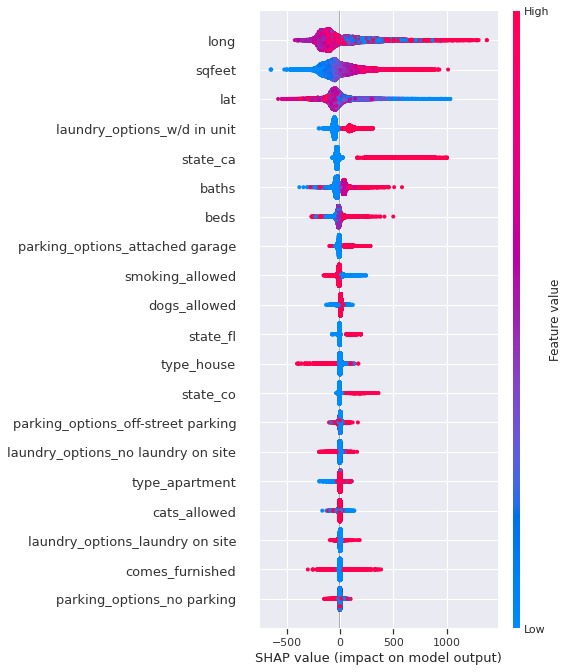

In [ ]:
shap.summary_plot(shap_values, X_test_lr)